## Install dependencies

In [1]:
import os
import tensorflow as tf
%matplotlib inline

from data.abc import ABCPreProcessor

## Overview of Preprocessing steps

In this notebook, we will be preprocessing two types of data --> **ABC Notation** data and **Audio** data

### ABC Notation Data

- Strip away **Tune body**, **key**, **meter**, **rhythm** and store all other fields of an ABC track as metadata
- Use key and meter as conditioning symbols when generating a tune
- Tokenize according to vocabulary of musical transcription tokens

- Create a TFRecord Dataset consisting sequence examples like --> **[ tune, meter, key, rhythm ]**

### Audio Data
- Turning the full audio into short examples (4 seconds by default, but adjustable with flags)
- Inferring the fundamental frequency (or "pitch") with CREPE
- Computing the loudness features

- Create TFRecord Dataset consisting sequence examples like --> **[ Audio, f0_feature, loudness_feature ]**

#### Each tune be indexed such that using its ID, we can find its ABC Notation as well as related audio files
- A tune can be associated with more than one audio file (Different audio lengths!!)

At the end of the file, we should merge both the datasets, to obtain a single TFRecord file containing preprocessed ABC data and preprocessed audio files indexed according to the different tunes

## Initialize common variables

In [2]:
# Mention the path to the datastore
BASE_DIR = "/home/richhiey/Desktop/workspace/projects/AI_Music_Challenge_2020/"
ABC_DATA_DIR = os.path.join(BASE_DIR, "datasets", "abc_data")
AUDIO_DATA_DIR = os.path.join(BASE_DIR, "datasets", "audio")
ABC_TFRECORD_DIR = os.path.join(BASE_DIR, "tfrecords", 'abc')
AUDIO_TFRECORD_DIR = os.path.join(BASE_DIR, "tfrecords", 'audio')
PROCESSED_ABC_FILENAME = 'processed-abc-files'
PROCESSED_AUDIO_FILENAME = 'processed-audio-files'

## Preprocessing - ABC Notation Dataset

#### To understand the underlying distribution of tunes in Irish music, it can be helpful to visualize the following quantities:
- Calculate maximum length of tunes in each category
- Number of tunes in each category
- Number of tunes in each key
- Number of tunes in each meter

The raw data has already been processed. Pre-processed information found at - /home/richhiey/Desktop/workspace/projects/AI_Music_Challenge_2020/tfrecords/abc/processed-abc-files.json
The TFRecord file already exists at /home/richhiey/Desktop/workspace/projects/AI_Music_Challenge_2020/tfrecords/abc/processed-abc-files.tfrecord ...
<MapDataset shapes: {key: (), meter: (), rhythm: (), tune: ()}, types: {key: tf.int64, meter: tf.int64, rhythm: tf.int64, tune: tf.string}>


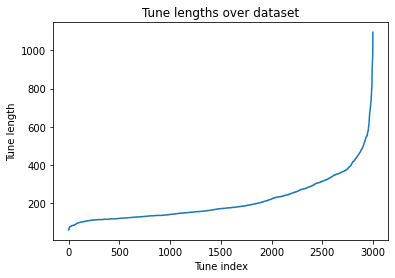

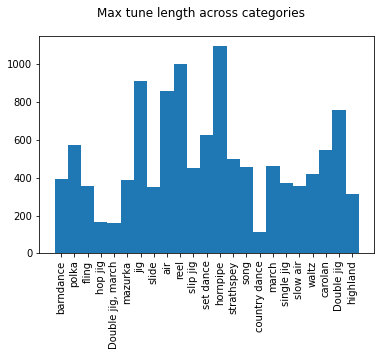

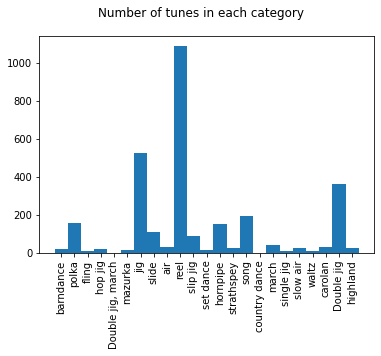

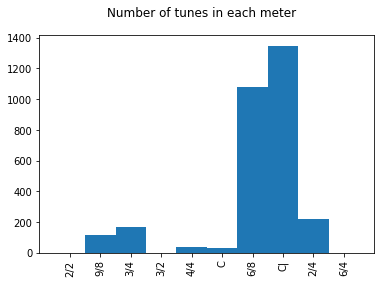

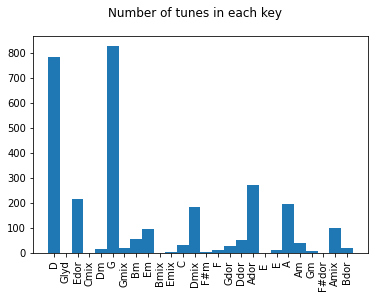

In [3]:
preprocessor = ABCPreProcessor(ABC_TFRECORD_DIR, PROCESSED_ABC_FILENAME)
json_path = preprocessor.process(ABC_DATA_DIR)
tfrecord_path = preprocessor.save_as_tfrecord_dataset()
preprocessed_dataset = preprocessor.load_tfrecord_dataset()

# abc_dataset = preprocessor.prepare_dataset(preprocessed_dataset)
preprocessor.visualize_stats()

In [4]:
print(preprocessed_dataset)
for x in preprocessed_dataset:
    print(x['tune'])
    print(x['key'])
    print(x['rhythm'])
    print(x['meter'])
    break

<MapDataset shapes: {key: (), meter: (), rhythm: (), tune: ()}, types: {key: tf.int64, meter: tf.int64, rhythm: tf.int64, tune: tf.string}>
tf.Tensor(b'\x08\x03\x12\x05\x12\x03\x08\xc7\x08"\x9c"\x02\x00\x00\x00\x04\x00\x00\x00\x02\x00\x00\x00\x0e\x00\x00\x00\x0c\x00\x00\x00\x0e\x00\x00\x00\x01\x00\x00\x00\x03\x00\x00\x00\x08\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00\x07\x00\x00\x00\x0c\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00\x08\x00\x00\x00\x01\x00\x00\x00\x03\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00\x08\x00\x00\x00\x03\x00\x00\x00\x05\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x04\x00\x00\x00\x02\x00\x00\x00\x10\x00\x00\x00\x0e\x00\x00\x00\x0f\x00\x00\x00\x01\x00\x00\x00\x03\x00\x00\x00\x08\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00\x07\x00\x00\x00\x0c\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00\x0b\x00\x00\x00\x07\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x05\x00\x00\x00\x01\x00\x00\x00\x15\x00\x00\x00\t\x00